In [ ]:
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

In [ ]:
file = open(r"/content/drive/MyDrive/sherlock.txt",encoding='utf-8')

In [ ]:
#Remove \n occurence
wordslist = file.read().splitlines() 
T1 = ""
T1 = T1.join(wordslist)
T1[:2000]

In [ ]:
#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
text = ""
for char in T1:
    if char not in punctuations:
        text += char
T1=text
T1[:2000]

In [ ]:
#Converting the text into lower case       
T1 = T1.lower()
T1[:2000]

In [ ]:
#Remove numbers
T1 = re.sub(r'\d+','',T1)
T1[:2000]

In [ ]:
#Remove whitespace from text
def remove_whitespace(text):
    return  " ".join(text.split())
remove_whitespace(T1)

In [ ]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

lemmatize_word(T1)

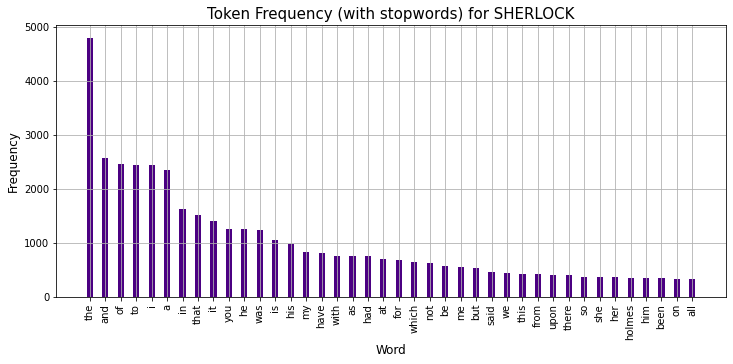

In [ ]:
#Frequency distribution of tokens(with stopwords)
tokens = word_tokenize(T1)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords) for SHERLOCK',size=15)
plt.xlabel('Word',size=12)
plt.ylabel('Frequency',size=12)
plt.show()

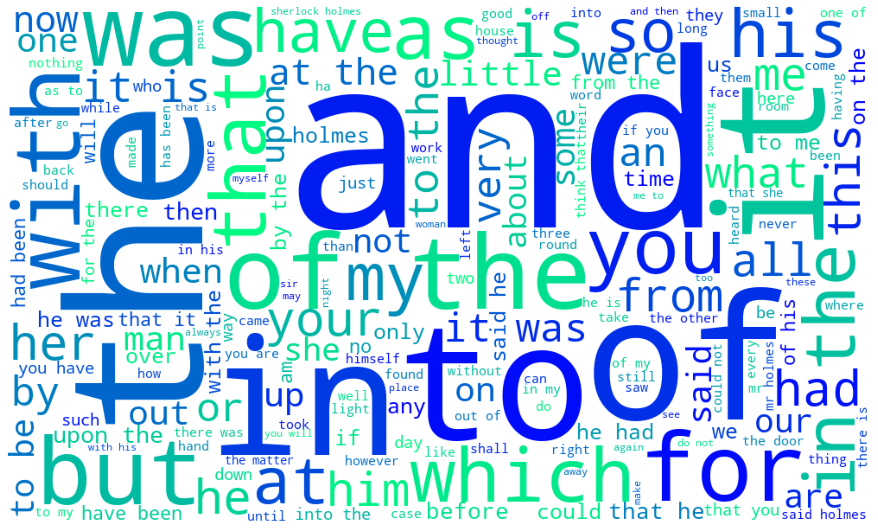

In [ ]:
#Wordcloud (with stopwords)
wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 5,stopwords = {},colormap='winter').generate(T1) 
plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
#Removing stopwords
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(T1)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
text = " "
text = text.join(tokens_final)
book=text
book[:2000]

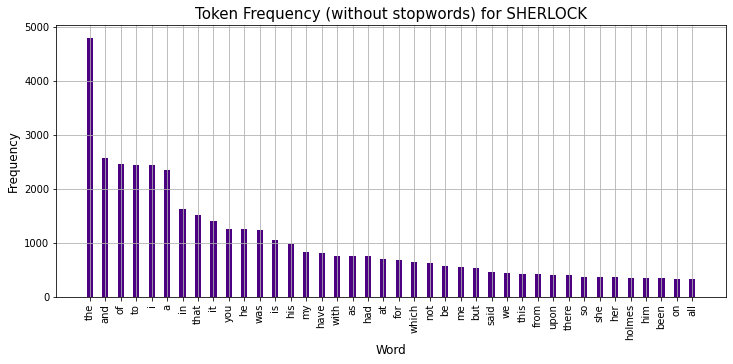

In [ ]:
#Frequency distribution of tokens(without stopwords)
tokens = word_tokenize(T1)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (without stopwords) for SHERLOCK',size=15)
plt.xlabel('Word',size=12)
plt.ylabel('Frequency',size=12)
plt.show()

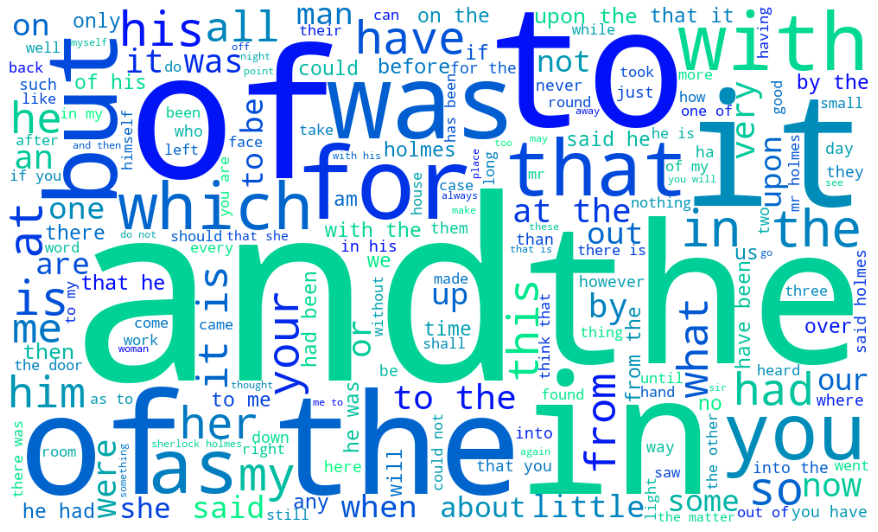

In [ ]:
#Word cloud after removing stopwords
wordcloud = WordCloud(width = 1000, height = 600, 
                background_color ='white', 
                min_font_size = 5,stopwords = {},colormap='winter').generate(T1) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

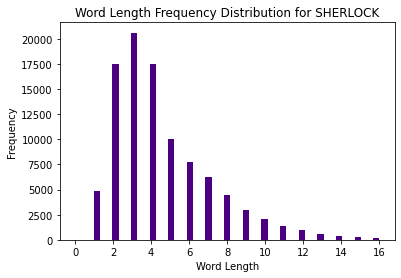

In [ ]:
bin_size=np.linspace(0,16)
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size,color='indigo')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Frequency Distribution for SHERLOCK')
plt.show()

In [ ]:
#POS tags
tagged = nltk.pos_tag(tokens) 
tagged[:20] 

In [ ]:
counts = Counter( tag for word,  tag in tagged)
print(counts)

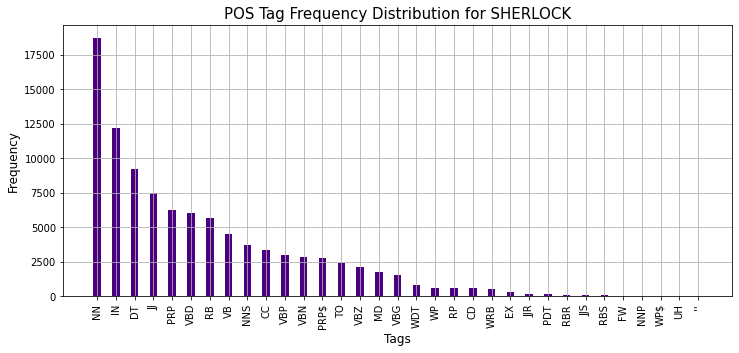

In [ ]:
freq_tags = nltk.FreqDist(counts)
freq_tags = {k: v for k, v in sorted(freq_tags.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags.keys())[:40]
y = list(freq_tags.values())[:40]
plt.figure(figsize=(12,5))
plt.bar(x,y,color ='indigo',width = 0.4)
plt.grid()
plt.xticks(rotation=90)
plt.title('POS Tag Frequency Distribution for SHERLOCK',size=15)
plt.xlabel('Tags',size=12)
plt.ylabel('Frequency',size=12)
plt.show()